In [1]:
import os
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

In [2]:
# Let's open the image
image_path = os.path.join(os.pardir, os.pardir, os.pardir, 'img', 'segmentation', 'coffee_grains.jpg')
img = cv.imread(image_path) 

In [3]:
# We need to re-format the data, we currently have three matrices (3 color values BGR) 
pixel_data = np.float32(img.reshape((-1,3)))

In [4]:
# then perform k-means clustering with random centers
# we can set accuracy to (i.e.) 90 (epsilon)
# and set a maximum number of iterations to 50

number_of_clusters = 2
stop_conds= (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 0.90) 
number_of_attempts = 6

_, regions, centers  = cv.kmeans(pixel_data, number_of_clusters, None, stop_conds, number_of_attempts , cv.KMEANS_RANDOM_CENTERS) 

print(regions)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [5]:
# convert data to image format again again, with its original dimensions
regions = np.uint8(centers)[regions.flatten()]
segmented_image = regions.reshape((img.shape))

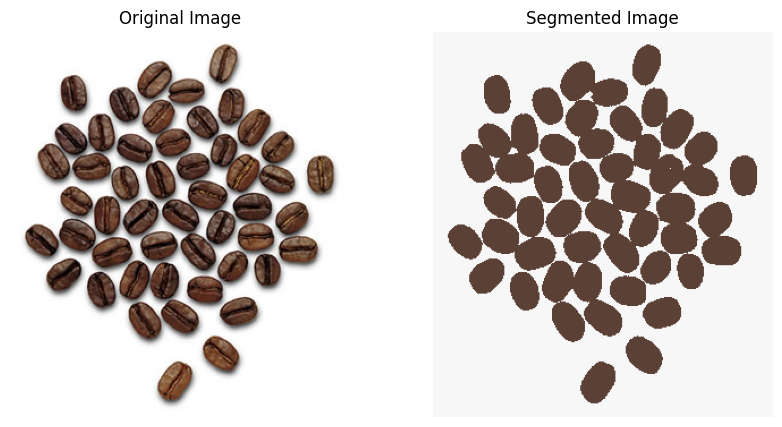

In [6]:
# We display original image and result 'segmented' image 
# Probably we need to adjust the number of regions
# And we have to think that we only are considering color information (no neighborhood)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()

# Using a different color space (YUV)

In [7]:
img_yuv = cv.cvtColor(img, cv.COLOR_BGR2YUV)
pixel_data = np.float32(img_yuv.reshape((-1,3)))

In [8]:
number_of_clusters = 2
stop_conds= (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 0.90)
number_of_attempts = 6

_, regions, centers  = cv.kmeans(pixel_data, number_of_clusters, None, stop_conds, number_of_attempts , cv.KMEANS_RANDOM_CENTERS)

regions = np.uint8(centers)[regions.flatten()]
segmented_image = regions.reshape((img_yuv.shape))

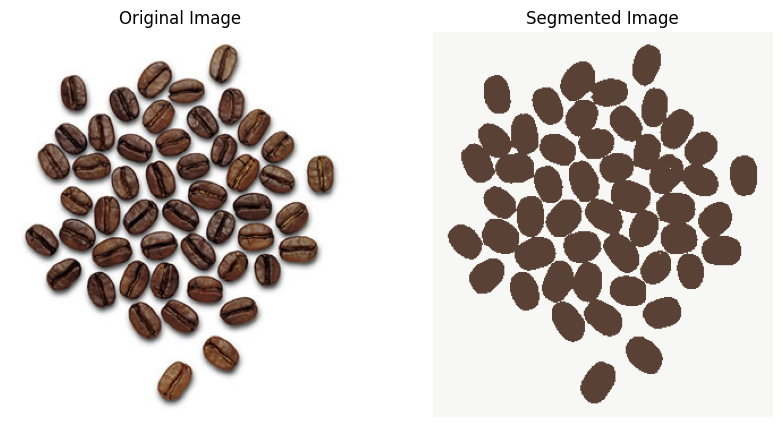

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(segmented_image, cv.COLOR_YUV2RGB))
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()

As we can see the results shown that the clustering still dividing the image in two regions successfully, even if the color space is different.

# Using a different color space (GRAY)
In this case, we are going to use the gray color space, which is a single channel color space. Thus, the code is going to be slightly different.

In [10]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# The reshape is going to be different, as we only have one channel
pixel_data = np.float32(img_gray.reshape((-1,1)))

In [11]:
number_of_clusters = 2
stop_conds= (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 50, 0.90)
number_of_attempts = 6

_, regions, centers  = cv.kmeans(pixel_data, number_of_clusters, None, stop_conds, number_of_attempts , cv.KMEANS_RANDOM_CENTERS)

regions = np.uint8(centers)[regions.flatten()]
segmented_image = regions.reshape((img_gray.shape))

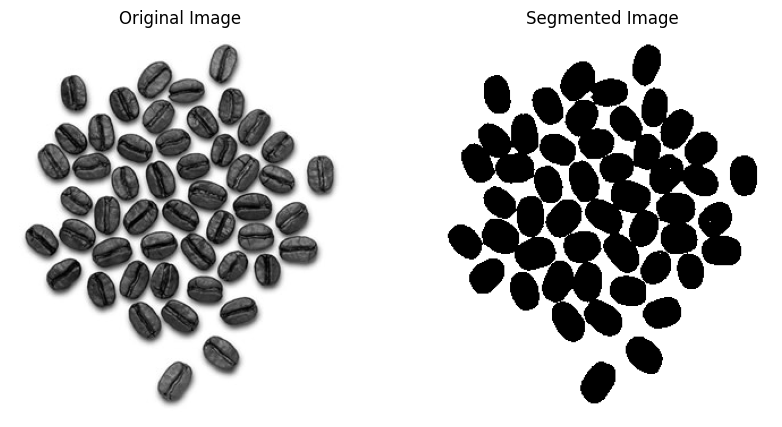

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(segmented_image, cmap='gray')
ax[1].set_title('Segmented Image')
ax[1].axis('off')
plt.show()

As it is shown in the results, the clustering is still able to divide the image in two regions with a single channel color space.